# Выбор локации для скважины

Заказчик - добывающая компания. Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Цель исследования — построить модель для определения региона, где добыча принесёт наибольшую прибыль, проанализировав возможную прибыль и риски.

Данные получим из файлов geo_data_0.csv, geo_data_1.csv, geo_data_2.csv. В них предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны

Исследование пройдёт в пять этапов:

* Подготовка данных
* Обучение и проверка модели
* Подготовка к расчёту прибыли
* Расчёт прибыли и рисков
* Итоговый выбор региона

## Загрузка и подготовка данных <a id='exam_file'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import RandomState

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

r_state = 12345
state = RandomState(r_state)

In [2]:
data0 = pd.read_csv('datasets/geo_data_0.csv')
data1 = pd.read_csv('datasets/geo_data_1.csv')
data2 = pd.read_csv('datasets/geo_data_2.csv')

In [3]:
datas = {'Регион 1' : data0, 'Регион 2' : data1, 'Регион 3' : data2}

for i in datas:
    print('Общие сведения "{}":'.format(i))
    print()
    datas[i].info()
    display(datas[i].sample(5, random_state=r_state))

    print('Количество пропусков по столбцам:')
    print()

    for col in datas[i].columns:
        nmv = datas[i][col].isna().sum()
        pmv = nmv/len(datas[i])
        print('{} - {} шт. - {:.2%}'.format(col, nmv, pmv))
    
    print()
    print('Количество явных дубликатов:', datas[i].duplicated().sum())
    print()

Общие сведения "Регион 1":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
71751,7Z2gx,0.948970,-0.057547,2.095727,10.038645
80493,b2HU8,0.992974,0.206671,-0.142278,114.551489
2655,Y0dXD,1.199854,-0.563356,-1.852991,132.603635
53233,Mje59,0.691422,-0.433347,0.564974,169.072125
91141,yqXxU,0.420772,0.972638,0.736190,122.325180


Количество пропусков по столбцам:

id - 0 шт. - 0.00%
f0 - 0 шт. - 0.00%
f1 - 0 шт. - 0.00%
f2 - 0 шт. - 0.00%
product - 0 шт. - 0.00%

Количество явных дубликатов: 0

Общие сведения "Регион 2":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
71751,aTbUt,-0.371866,-1.862494,3.002210,80.859783
80493,CK34V,9.015122,-13.881455,1.995363,53.906522
2655,ioXCO,-6.507568,-4.817448,1.003449,30.132364
53233,xk6tF,14.560845,-10.667755,1.995175,53.906522
91141,F9AmG,6.090476,-4.494723,0.013815,0.000000


Количество пропусков по столбцам:

id - 0 шт. - 0.00%
f0 - 0 шт. - 0.00%
f1 - 0 шт. - 0.00%
f2 - 0 шт. - 0.00%
product - 0 шт. - 0.00%

Количество явных дубликатов: 0

Общие сведения "Регион 3":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
71751,DMlgl,-1.444717,-3.861599,2.225805,61.212375
80493,tbrRC,-1.418617,1.276544,-0.976433,41.850118
2655,JRs1w,-4.587649,-0.413199,1.649268,57.776581
53233,bidOx,1.871584,1.619101,4.273555,100.053761
91141,AcBBB,-2.028785,4.128167,6.089547,109.897122


Количество пропусков по столбцам:

id - 0 шт. - 0.00%
f0 - 0 шт. - 0.00%
f1 - 0 шт. - 0.00%
f2 - 0 шт. - 0.00%
product - 0 шт. - 0.00%

Количество явных дубликатов: 0



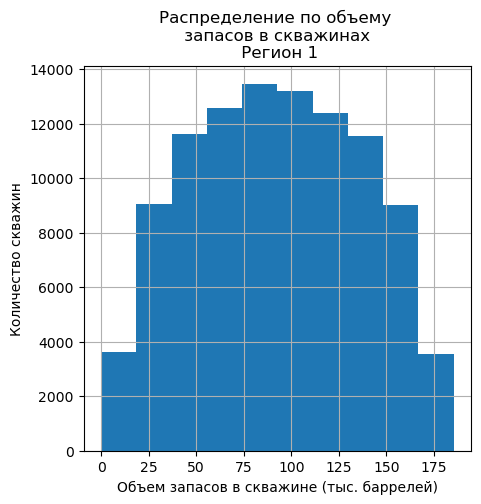

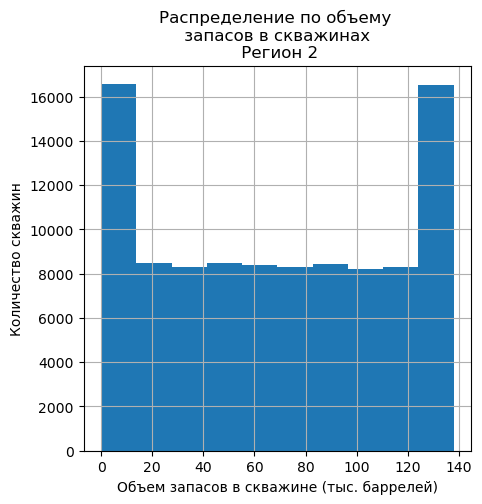

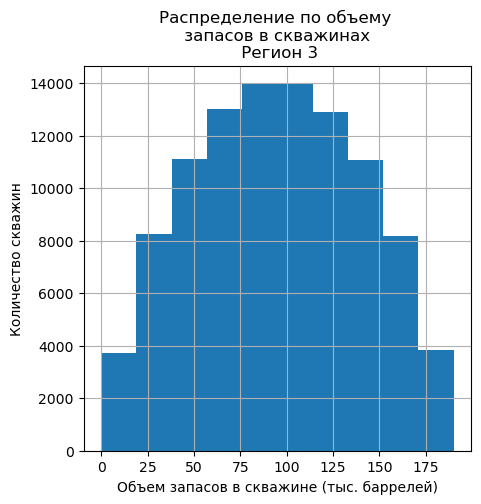

In [4]:
for i in datas:
    datas[i]['product'].hist(figsize=(5, 5));
    plt.title("Распределение по объему \n запасов в скважинах \n {}".format(i))
    plt.xlabel("Объем запасов в скважине (тыс. баррелей)")
    plt.ylabel("Количество скважин")
    plt.show()

По гистограммам можно определить:
* У Региона 1 и Региона 3 (data0 и data2) распределение объемов в скважинах близко к нормальному 
* В Регионе 2 (data1) данные имеют нетипичное распределение и не подчиняются *нормальному закону распределения*
    * Либо в данных ошибка
    * Либо данные созданы искусственно (синтетические)

Признаки:

* id — уникальный идентификатор скважины
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы)

Целевой признак:

* product — объём запасов в скважине (тыс. баррелей)

Каждый набор данных из трех регионов:
* Состоит из 100000 объектов
* Имеет 5 признаков (1 целевой и 4 вспомогательных)
* Явные дубликаты отсутствуют
* Признак "id" ни как не влияет на обучение модели
    * Удалим данный признак

In [5]:
data0 = data0.drop(['id'], axis=1)
data1 = data1.drop(['id'], axis=1)
data2 = data2.drop(['id'], axis=1)

## Обучение и проверка модели <a id='learn'></a>

### Разобьем данные на обучающую и валидационную выборки в соотношении 75:25

Создадим функцию для разбивки

In [6]:
def split_data(data, target):
    features = data.drop([target] , axis=1)
    target = data[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=r_state)
    
    features_list = {'features_train' : features_train, 'features_valid' : features_valid}
    targets_list = {'target_train' : target_train, 'target_valid' : target_valid}

    print('Вспомогательные признаки:')
    print()
    for i in features_list:
        sh = features_list[i].shape
        psh = sh[0]/len(data)
        print('{} - Объектов: {} шт., признаков: {} шт. - {:.2%}'.format(i, sh[0], sh[1], psh))
    
    print()

    print('Целевые признаки:')
    print()
    for i in targets_list:
        sh = targets_list[i].shape
        psh = sh[0]/len(data)
        print('{} - Объектов: {} шт. - {:.2%}'.format(i, sh[0], psh))
    
    return features_train, features_valid, target_train, target_valid

#### Регион 1

In [7]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_data(data0, 'product')

Вспомогательные признаки:

features_train - Объектов: 75000 шт., признаков: 3 шт. - 75.00%
features_valid - Объектов: 25000 шт., признаков: 3 шт. - 25.00%

Целевые признаки:

target_train - Объектов: 75000 шт. - 75.00%
target_valid - Объектов: 25000 шт. - 25.00%


#### Регион 2

In [8]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(data1, 'product')

Вспомогательные признаки:

features_train - Объектов: 75000 шт., признаков: 3 шт. - 75.00%
features_valid - Объектов: 25000 шт., признаков: 3 шт. - 25.00%

Целевые признаки:

target_train - Объектов: 75000 шт. - 75.00%
target_valid - Объектов: 25000 шт. - 25.00%


#### Регион 3

In [9]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(data2, 'product')

Вспомогательные признаки:

features_train - Объектов: 75000 шт., признаков: 3 шт. - 75.00%
features_valid - Объектов: 25000 шт., признаков: 3 шт. - 25.00%

Целевые признаки:

target_train - Объектов: 75000 шт. - 75.00%
target_valid - Объектов: 25000 шт. - 25.00%


### Обучим модель и сделаем предсказания на валидационной выборке

Создадим функцию для обучения

In [10]:
def model_learning(features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    return pd.Series(model.predict(features_valid))

#### Регион 1

In [11]:
predicted_0 = model_learning(features_train_0, target_train_0, features_valid_0)

#### Регион 2

In [12]:
predicted_1 = model_learning(features_train_1, target_train_1, features_valid_1)

#### Регион 3

In [13]:
predicted_2 = model_learning(features_train_2, target_train_2, features_valid_2)

### Изучим средний запас предсказанного сырья и RMSE модели

Создадим функцию для вывода необходимых данных

In [14]:
def av_stock_rmse(target_valid, predicted):
    mse = mean_squared_error(target_valid, predicted)
    print('Средний запас предсказанного сырья (тыс. баррелей):', predicted.mean())
    print('RMSE модели:', mse ** 0.5)

#### Регион 1

In [15]:
av_stock_rmse(target_valid_0, predicted_0)

Средний запас предсказанного сырья (тыс. баррелей): 92.59256778438005
RMSE модели: 37.5794217150813


#### Регион 2

In [16]:
av_stock_rmse(target_valid_1, predicted_1)

Средний запас предсказанного сырья (тыс. баррелей): 68.72854689544583
RMSE модели: 0.8930992867756183


#### Регион 3

In [17]:
av_stock_rmse(target_valid_2, predicted_2)

Средний запас предсказанного сырья (тыс. баррелей): 94.96504596800506
RMSE модели: 40.02970873393434


### Анализ результатов

* Средний запас предсказанного сырья (тыс. баррелей):
    * Регион 3 (94.96504596800489)
    * Регион 1 (92.59256778438035)
    * Регион 2 (68.728546895446)

* RMSE модели:
    * Регион 2 (0.893099286775617)
    * Регион 1 (37.5794217150813)
    * Регион 3 (40.02970873393434) 

* Наивысший средний запас предсказанного сырья (тыс. баррелей) в Регионе 3 (94.96504596800489)

* Лучшее качество предсказаний запасов модель показала в Регионе 2 (RMSE - 0.89), вероятнее всего из-за синтетических данных

## Подготовка к расчёту прибыли <a id='preparation_calc'></a>

### Все ключевые значения для расчётов сохраним в отдельных переменных

In [18]:
# Расчет рисков и прибыли:

# Количество исследуемых точек
n_research_points = 500
# Количество лучших точек
n_top_points = 200
# Бюджет на разработку скважин в регионе
budget = 10**10
# Цена за 1000 баррелей
price_1k_barrel = 450000
# Максимальный приемлемый риск
max_risk = 0.025

# Bootstrap: 

# Доверительный интервал
conf_interval = 0.95
# Количество выборок
n_select = 1000 

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [19]:
min_volume_materials = budget / n_top_points / price_1k_barrel
print("Средний объём сырья для безубыточной разработки новой скважины {:.2f} тыс. баррелей".format(min_volume_materials))

Средний объём сырья для безубыточной разработки новой скважины 111.11 тыс. баррелей


### Сравним полученный объём сырья со средним запасом в каждом регионе

In [20]:
print('Сравнение по всем скважинам в регионе')
print()

for i in datas:
    
    mean_i = datas[i]['product'].mean()
    
    print('{}:'.format(i))
    print()
    print('Средний запас фактичекой нефти на скважину: {:.2f} тыс. баррелей'.format(mean_i))
    print('Разница от среднего безубыточного: {:.2%}'.format(mean_i / min_volume_materials - 1))
    print()

Сравнение по всем скважинам в регионе

Регион 1:

Средний запас фактичекой нефти на скважину: 92.50 тыс. баррелей
Разница от среднего безубыточного: -16.75%

Регион 2:

Средний запас фактичекой нефти на скважину: 68.83 тыс. баррелей
Разница от среднего безубыточного: -38.06%

Регион 3:

Средний запас фактичекой нефти на скважину: 95.00 тыс. баррелей
Разница от среднего безубыточного: -14.50%



In [21]:
print('Сравнение по {} случайным скважинам в регионе'.format(n_research_points))
print()

for i in datas:
    
    sample_mean_i = datas[i]['product'].sample(n_research_points, random_state=r_state).mean()
    
    print('{}:'.format(i))
    print()
    print('Средний запас фактичекой нефти на скважину: {:.2f} тыс. баррелей'.format(sample_mean_i))
    print('Разница от среднего безубыточного: {:.2%}'.format(sample_mean_i / min_volume_materials - 1))
    print()

Сравнение по 500 случайным скважинам в регионе

Регион 1:

Средний запас фактичекой нефти на скважину: 89.77 тыс. баррелей
Разница от среднего безубыточного: -19.21%

Регион 2:

Средний запас фактичекой нефти на скважину: 67.02 тыс. баррелей
Разница от среднего безубыточного: -39.68%

Регион 3:

Средний запас фактичекой нефти на скважину: 93.51 тыс. баррелей
Разница от среднего безубыточного: -15.84%



In [22]:
print('Сравнение по TOP-{} скважин из случайных {} в регионе'.format(n_top_points, n_research_points))
print()

for i in datas:
    
    sorted_mean_i = datas[i]['product'].sample(
        n_research_points, random_state=r_state).sort_values(ascending=False).head(n_top_points).mean()
    
    print('{}:'.format(i))
    print()
    print('Средний запас фактичекой нефти на скважину: {:.2f} тыс. баррелей'.format(sorted_mean_i))
    print('Разница от среднего безубыточного: {:.2%}'.format(sorted_mean_i / min_volume_materials - 1))
    print()

Сравнение по TOP-200 скважин из случайных 500 в регионе

Регион 1:

Средний запас фактичекой нефти на скважину: 133.76 тыс. баррелей
Разница от среднего безубыточного: 20.38%

Регион 2:

Средний запас фактичекой нефти на скважину: 114.63 тыс. баррелей
Разница от среднего безубыточного: 3.16%

Регион 3:

Средний запас фактичекой нефти на скважину: 138.12 тыс. баррелей
Разница от среднего безубыточного: 24.31%



### Анализ результатов

* Средний объём сырья для безубыточной разработки новой скважины 111.11 тыс. баррелей
* По среднему запасу фактичекой нефти по всем скважинам в регионах:
    * Средний запас фактичекой нефти на скважину:
        * Регион 1 - 92.5 тыс. баррелей
        * Регион 2 - 68.83 тыс. баррелей
        * Регион 3 - 95.0 тыс. баррелей
    * Разница от среднего безубыточного:
        * Регион 1 - меньше на 16.75 %
        * Регион 2 - меньше на 38.06 %
        * Регион 3 - меньше на 14.5 % 
    * Разработка всех скважин в любом регионе будет убыточной
* По 500 случайным скважинам в регионе:
    * Средний запас фактичекой нефти на скважину:
        * Регион 1 - 89.77 тыс. баррелей
        * Регион 2 - 67.02 тыс. баррелей
        * Регион 3 - 93.51 тыс. баррелей
    * Разница от среднего безубыточного:
        * Регион 1 - меньше на 19.21 %
        * Регион 2 - меньше на 39.68 %
        * Регион 3 - меньше на 15.84 % 
    * Разработка 500 случайных скважин в любом регионе будет убыточной 
* По TOP-200 скважин из случайных 500 в регионе:
    * Средний запас фактичекой нефти на скважину:
        * Регион 1 - 133.76 тыс. баррелей
        * Регион 2 - 114.63 тыс. баррелей
        * Регион 3 - 138.12 тыс. баррелей
    * Разница от среднего безубыточного:
        * Регион 1 - больше на 20.38 %
        * Регион 2 - больше на 3.16 %
        * Регион 3 - больше на 24.31 % 
    * Разработка TOP-200 скважин из случайных 500 наиболее выгодна в Регионе 1 и Регионе 3 

## Расчёт прибыли и рисков <a id='calc_profit_risks'></a>

### Создадим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [23]:
def profit_calc(target, predicted, count):
    sorted_predicted = predicted.sort_values(ascending=False)
    target_sum = target.iloc[sorted_predicted.index][:count].sum()
    return price_1k_barrel * target_sum - budget

### Посчитаем риски и прибыль для каждого региона

In [24]:
def bootstrap(n_select, target, predicted, conf_interval):
    val=[]
    loss = 0
    for i in range(n_select):
        predicted_sample = predicted.sample(n=n_research_points, random_state=state, replace=True)
        profit = profit_calc(target, predicted_sample, n_top_points)
        if profit < 0:
            loss +=1
        val.append(profit)
    
    l_quant = (1 - conf_interval) / 2
    u_quant = 1 - l_quant
    
    val = pd.Series(val)
    lower = val.quantile(l_quant)
    upper = val.quantile(u_quant)
    val_mean = val.mean()
    risk = loss / len(val)
    return val_mean, lower, upper, risk

In [25]:
val_mean_0, lower_0, upper_0, risk_0 = bootstrap(n_select, target_valid_0, predicted_0, conf_interval)
val_mean_1, lower_1, upper_1, risk_1 = bootstrap(n_select, target_valid_1, predicted_1, conf_interval)
val_mean_2, lower_2, upper_2, risk_2 = bootstrap(n_select, target_valid_2, predicted_2, conf_interval)

#### Регион 1

In [26]:
print('Средняя прибыль по региону = {:.2f} руб.'.format(val_mean_0))
print('95% доверительный интервал от {:.2f} руб. до {:.2f} руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Средняя прибыль по региону = 396164984.80 руб.
95% доверительный интервал от -111215545.89 руб. до 909766941.55 руб.
Процент риска 6.90%


#### Регион 2

In [27]:
print('Средняя прибыль по региону = {:.2f} руб.'.format(val_mean_1))
print('95% доверительный интервал от {:.2f} руб. до {:.2f} руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Средняя прибыль по региону = 461155817.28 руб.
95% доверительный интервал от 78050810.75 руб. до 862952060.26 руб.
Процент риска 0.70%


#### Регион 3

In [28]:
print('Средняя прибыль по региону = {:.2f} руб.'.format(val_mean_2))
print('95% доверительный интервал от {:.2f} руб. до {:.2f} руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Средняя прибыль по региону = 392950475.17 руб.
95% доверительный интервал от -112227625.38 руб. до 934562914.55 руб.
Процент риска 6.50%


### Ощий итог расчета

Регион 1:
* Средняя прибыль по региону = 396164984.80 руб.
* 95% доверительный интервал от -111215545.89 руб. до 909766941.55 руб.
* Процент риска 6.90%

Регион 2:
* Средняя прибыль по региону = 461155817.28 руб.
* 95% доверительный интервал от 78050810.75 руб. до 862952060.26 руб.
* Процент риска 0.70%

Регион 3:
* Средняя прибыль по региону = 392950475.17 руб.
* 95% доверительный интервал от -112227625.38 руб. до 934562914.55 руб.
* Процент риска 6.50%

## Итоговый выбор региона  <a id='choice'></a>

In [29]:
risks = {'Регион 1' : risk_0, 'Регион 2' : risk_1, 'Регион 3' : risk_2}
val_means = {'Регион 1' : val_mean_0, 'Регион 2' : val_mean_1, 'Регион 3' : val_mean_2}
best_region = ''
best_risk = 0
best_mean = 0

for i in risks:
    if risks[i] > max_risk:
        print('{} не подходит для разработки из-за большого процента риска - {:.2%}'.format(i, risks[i]))
        print()
    else:
        print('{} подходит для разработки, процент риска - {:.2%}'.format(i, risks[i]))
        print()
        if val_means[i] > best_mean:
            best_region = i
            best_risk = risks[i]
            best_mean = val_means[i]
            
print('Лучший регион для разработки - {}'.format(best_region))
print('Процент риска {:.2%}'.format(best_risk))
print('Средняя прибыль по региону = {:.2f} руб.'.format(best_mean))

Регион 1 не подходит для разработки из-за большого процента риска - 6.90%

Регион 2 подходит для разработки, процент риска - 0.70%

Регион 3 не подходит для разработки из-за большого процента риска - 6.50%

Лучший регион для разработки - Регион 2
Процент риска 0.70%
Средняя прибыль по региону = 461155817.28 руб.


## Общий вывод

Проведено исследование с целью построить модель для определения региона, где добыча принесёт наибольшую прибыль, проанализировав возможную прибыль и риски.

Данные были взяты из файлов geo_data_0.csv, geo_data_1.csv, geo_data_2.csv. В них предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны

Исследование проходило в пять этапов:

* [**Подготовка данных**](#exam_file) 
<br>

    * У Региона 1 и Региона 3 (data0 и data2) распределение объемов в скважинах близко к нормальному
    * В Регионе 2 (data1) данные имеют нетипичное распределение и не подчиняются нормальному закону распределения
        * Либо в данных ошибка
        * Либо данные созданы искусственно (синтетические)
    * Каждый набор данных из трех регионов:
        * Состоит из 100000 объектов
        * Имеет 5 признаков (1 целевой и 4 вспомогательных):
             * Признаки:
                * id — уникальный идентификатор скважины
                * f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы)
            * Целевой признак:
                * product — объём запасов в скважине (тыс. баррелей)
        * Явные дубликаты отсутствуют
        * Мы удалили признак "id", так как он ни как не влияет на обучение модели <br>
<br>

* [**Обучение и проверка модели**](#learn) 
<br>

    * Разделили данные на выборки для обучения:
        * Регион 1:
            * Вспомогательные признаки:
                * features_train - Объектов: 75000 шт., признаков: 3 шт. - 75.00%
                * features_valid - Объектов: 25000 шт., признаков: 3 шт. - 25.00%
            * Целевые признаки:
                * target_train - Объектов: 75000 шт. - 75.00%
                * target_valid - Объектов: 25000 шт. - 25.00%
        * Регион 2:
            * Вспомогательные признаки:
                * features_train - Объектов: 75000 шт., признаков: 3 шт. - 75.00%
                * features_valid - Объектов: 25000 шт., признаков: 3 шт. - 25.00%
            * Целевые признаки:
                * target_train - Объектов: 75000 шт. - 75.00%
                * target_valid - Объектов: 25000 шт. - 25.00%
        * Регион 3:
            * Вспомогательные признаки:
                * features_train - Объектов: 75000 шт., признаков: 3 шт. - 75.00%
                * features_valid - Объектов: 25000 шт., признаков: 3 шт. - 25.00%
            * Целевые признаки:
                * target_train - Объектов: 75000 шт. - 75.00%
                * target_valid - Объектов: 25000 шт. - 25.00%
    * Средний запас предсказанного сырья (тыс. баррелей):
        * Регион 1 (92.59256778438035)
        * Регион 2 (68.728546895446)
        * Регион 3 (94.96504596800489)
    * RMSE модели:
        * Регион 1 (37.5794217150813)
        * Регион 2 (0.893099286775617)
        * Регион 3 (40.02970873393434)
    * Наивысший средний запас предсказанного сырья (тыс. баррелей) в Регионе 3 (94.96504596800489)
    * Лучшее качество предсказаний запасов модель показала в Регионе 2 (RMSE - 0.89), вероятнее всего из-за синтетических данных <br>
<br>

* [**Подготовка к расчёту прибыли**](#preparation_calc) 
<br>

    * Все ключевые значения для расчётов сохранили в отдельных переменных
    * Средний объём сырья для безубыточной разработки новой скважины 111.11 тыс. баррелей
    * По среднему запасу фактичекой нефти по всем скважинам в регионах:
        * Средний запас фактичекой нефти на скважину:
            * Регион 1 - 92.5 тыс. баррелей
            * Регион 2 - 68.83 тыс. баррелей
            * Регион 3 - 95.0 тыс. баррелей
        * Разница от среднего безубыточного:
            * Регион 1 - меньше на 16.75 %
            * Регион 2 - меньше на 38.06 %
            * Регион 3 - меньше на 14.5 %
        * Разработка всех скважин в любом регионе будет убыточной
    * По 500 случайным скважинам в регионе:
        * Средний запас фактичекой нефти на скважину:
            * Регион 1 - 89.77 тыс. баррелей
            * Регион 2 - 67.02 тыс. баррелей
            * Регион 3 - 93.51 тыс. баррелей
        * Разница от среднего безубыточного:
            * Регион 1 - меньше на 19.21 %
            * Регион 2 - меньше на 39.68 %
            * Регион 3 - меньше на 15.84 %
        * Разработка 500 случайных скважин в любом регионе будет убыточной
    * По TOP-200 скважин из случайных 500 в регионе:
        * Средний запас фактичекой нефти на скважину:
            * Регион 1 - 133.76 тыс. баррелей
            * Регион 2 - 114.63 тыс. баррелей
            * Регион 3 - 138.12 тыс. баррелей
        * Разница от среднего безубыточного:
            * Регион 1 - больше на 20.38 %
            * Регион 2 - больше на 3.16 %
            * Регион 3 - больше на 24.31 %
        * Разработка TOP-200 скважин из случайных 500 наиболее выгодна в Регионе 1 и Регионе 3 <br>
<br>

* [**Расчёт прибыли и рисков**](#calc_profit_risks) 
<br>

    * Регион 1:
        * Средняя прибыль по региону = 396164984.80 руб.
        * 95% доверительный интервал от -111215545.89 руб. до 909766941.55 руб.
        * Процент риска 6.90%
    * Регион 2:
        * Средняя прибыль по региону = 461155817.28 руб.
        * 95% доверительный интервал от 78050810.75 руб. до 862952060.26 руб.
        * Процент риска 0.70%
    * Регион 3:
        * Средняя прибыль по региону = 392950475.17 руб.
        * 95% доверительный интервал от -112227625.38 руб. до 934562914.55 руб.
        * Процент риска 6.50% <br>
<br>

* [**Итоговый выбор региона**](#choice)
<br>

    * Регион 1 не подходит для разработки из-за большого процента риска - 6.90%
    * Регион 2 подходит для разработки, процент риска - 0.70%
    * Регион 3 не подходит для разработки из-за большого процента риска - 6.50%
    * Лучший регион для разработки:
        * Регион 2
        * Процент риска 0.70%
        * Средняя прибыль по региону = 461155817.28 руб.